ÇOKLU DOĞRUSAL REGRESYON

Çoklu Doğrusal Regresyon, bir bağımlı değişkenin (yanıt değişkeni) birden fazla bağımsız değişkenle (açıklayıcı değişkenler) arasındaki ilişkiyi modellemek için kullanılan istatistiksel bir tekniktir.

In [1]:
# "Advertising" verisetini yüklüyoruz.
import pandas as pd
# "usecols" parametresi, yalnızca belirtilen sütunların yüklenmesini sağlar.
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# Verisetini tanımak için incelemeler yapıyoruz.

In [3]:
# Verisetindeki sayısal sütunlar için istatistiksel özet bilgilerini inceliyoruz.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
# Veriseti içinde eksik değer olup olmadığını inceliyoruz.
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
# Değişkenler arasındaki korelasyonları inceliyoruz.
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


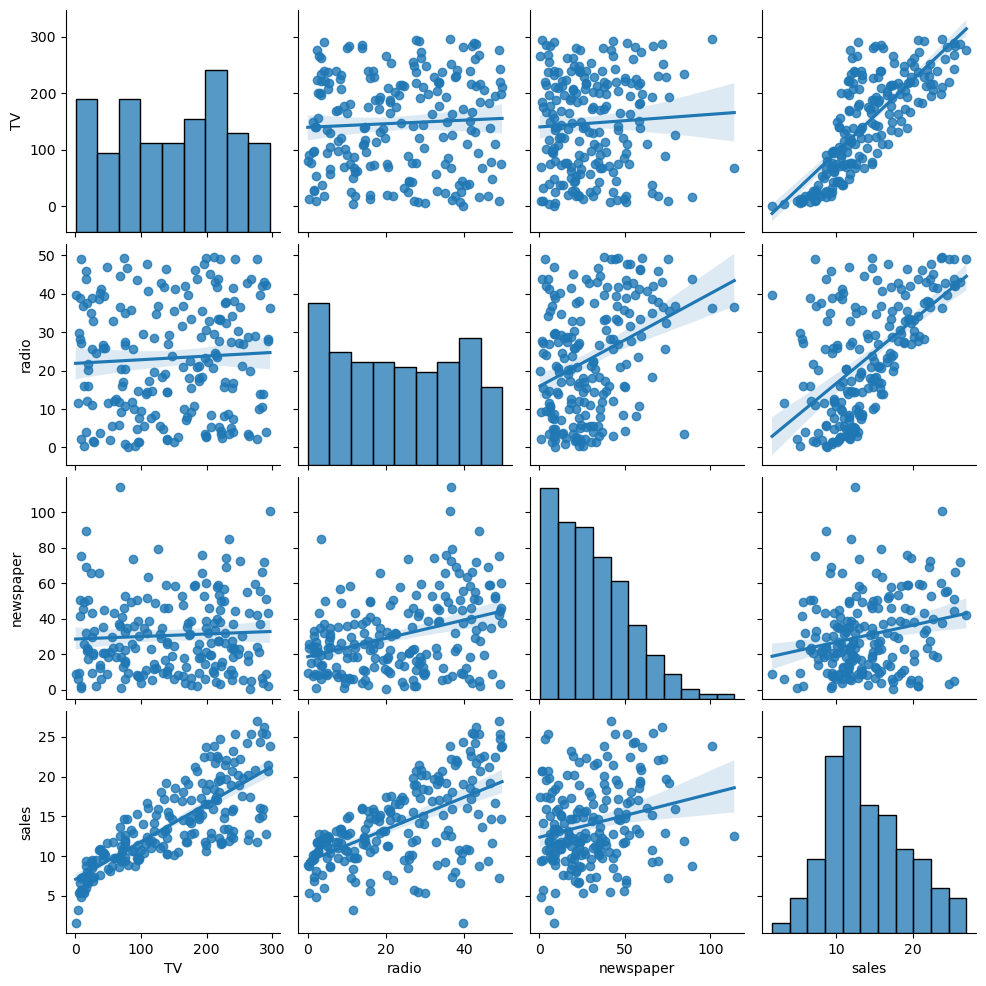

In [8]:
# Değişkenler arasındaki korelasyonu görsel olarak inceliyoruz.
import seaborn as sns
sns.pairplot(df, kind  ="reg");

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [10]:
# Verisetindeki bağımlı ve bağımsız değişkenleri belirliyoruz.
X = df.drop("sales", axis = 1)
y = df["sales"]

In [11]:
# Verisetini train ve test setlerine ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [12]:
# Modeli oluşturduk ve eğittik.
model = LinearRegression()
model = model.fit(X_train, y_train)

In [13]:
# Eğitim ve test veri setleri için doğruluk oranını hesapladık.
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)

print('Eğitim Seti Doğruluk Oranı:', accuracy_train)
print('Test Seti Doğruluk Oranı:', accuracy_test)

Eğitim Seti Doğruluk Oranı: 0.8957008271017818
Test Seti Doğruluk Oranı: 0.899438024100912


In [14]:
# İlave olarak "RMSE" değerini hesapladık.
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [18]:
# Model tahminini gerçekleştiriyoruz.
# 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda "satış" değerini tahmin ediyoruz.
prediction = model.predict([[30, 10, 40]])
print('Sales_Quantity:', prediction)

Sales_Quantity: [6.32334798]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
